# Instrucciones

"Encontrar los clústers y graficarlos en 3D"

In [1]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs  
from matplotlib import pyplot as plt 

In [2]:
# Define los centros de los clusters a partir de los cuales se generarán los datos
clusters = [[6, 6, 6], [2, 2, 2]]

# Genera datos de muestra utilizando la función make_blobs
# - centers: Lista de coordenadas de los centros de los clusters
# - cluster_std: Desviación estándar de los clusters, controla cuán dispersos están los puntos alrededor de los centros
X, y = make_blobs(centers=clusters, cluster_std=0.70)

In [3]:
# Estimamos el ancho de banda utilizando el método estimate_bandwidth
bandwidth = estimate_bandwidth(X, n_samples=500)

# Creamos una instancia del algoritmo MeanShift con el ancho de banda calculado
meanshift = MeanShift(bandwidth=bandwidth)

# Ajustamos el modelo de MeanShift a los datos X
meanshift.fit(X)

# Obtenemos los centros de los clusters encontrados por el algoritmo
cluster_centers = meanshift.cluster_centers_

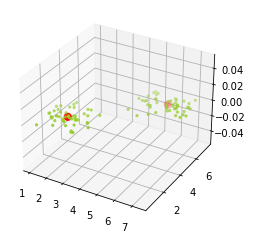

In [4]:
# Crear una figura para la visualización
fig = plt.figure()

# Agregar un subplot en 3D a la figura
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos de datos en el espacio 3D
ax.scatter(X[:, 0], X[:, 1], marker='.', color='yellowgreen')

# Graficar los centros de los clusters en el espacio 3D
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', color='red', s=10, linewidth=5,
           zorder=10)

# Mostrar la visualización
plt.show()